# Neural Network Workbook
Welcome to the Neural Network Workbook. Remember, ideally we would like to use TensorFlow or Keras for Deep Learning as they enable more features. In case you had trouble installing TensorFlow we will start with sklearn.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import tensorflow as tf

%matplotlib inline

Let's start with creating a data set with noise.

In [26]:
x = np.linspace(0, 2*np.pi, 5000)
# noise
np.random.seed(321)
noise = np.random.normal(0, .5, 5000)
# target variable
y = np.sin(x) + noise

We will plot the x and y to see how the data set looks.

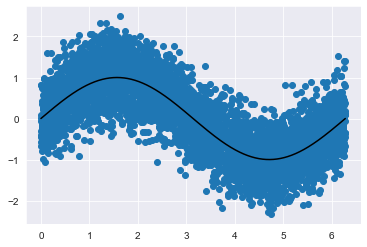

In [27]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)

# Scatterplot of x and y
ax.scatter(x, y)

# Overlay the sine wave
ax.plot(x, np.sin(x), color='k')

plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.reshape(-1, 1))

We are now going to split our data set into train and test sets.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)

## MLP Regressor
Now we import the MLPRegressor from sklearn.neural network library.

In [31]:
from sklearn.neural_network import MLPRegressor

In [32]:
mlp = MLPRegressor(random_state=5)

In [33]:
mlp.fit(X_train.reshape(-1, 1), y_train)

MLPRegressor(random_state=5)

Neural networks work with special shapes. Don't forget to reshape your input data set.

In [34]:
y_pred = mlp.predict(X_test.reshape(-1, 1))

Let's see how our first prediction looks like.

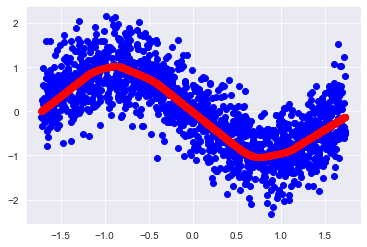

In [35]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)


# Overlay the sine wave
ax.scatter(X_test, y_test, color='b')
# Overlay the sine wave
ax.scatter(X_test, y_pred, color='r')

plt.show()

Text(0.5, 1.0, 'Loss Curve')

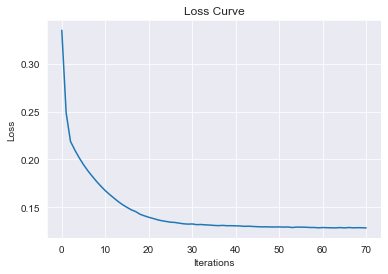

In [36]:
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')

In [37]:
print(np.shape(mlp.coefs_), np.shape(mlp.coefs_[0]))

(2,) (1, 100)


/Users/dsozturk/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


Text(0.5, 0, 'Neurons in First Input')

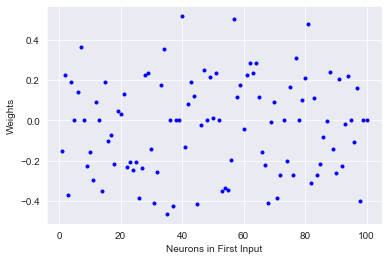

In [38]:
plt.plot(np.arange(1,101,1).reshape(1,100),mlp.coefs_[0],'b.')
plt.ylabel('Weights')
plt.xlabel('Neurons in First Input')

We can do better, but how?
### Changing Neuron Number
Let's try changing the neuron number.

In [39]:
mlp2 = MLPRegressor(random_state=5, hidden_layer_sizes=[10])

In [40]:
mlp2.fit(X_train.reshape(-1, 1), y_train)

/Users/dsozturk/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=[10], random_state=5)

In [41]:
y_pred2 = mlp2.predict(X_test.reshape(-1, 1))

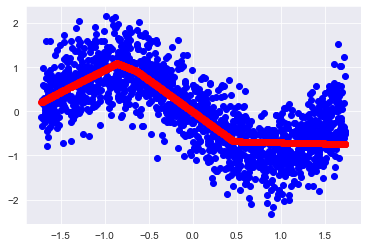

In [42]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)


# Overlay the sine wave
ax.scatter(X_test, y_test, color='b')
# Overlay the sine wave
ax.scatter(X_test, y_pred2, color='r')

plt.show()

We certainly didn't do any better. Let's increate the neuron size above the default value.

In [43]:
mlp3 = MLPRegressor(random_state=5, hidden_layer_sizes=[200])

In [44]:
mlp3.fit(X_train.reshape(-1, 1), y_train)

MLPRegressor(hidden_layer_sizes=[200], random_state=5)

In [45]:
y_pred3 = mlp3.predict(X_test.reshape(-1, 1))

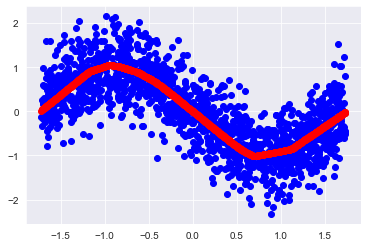

In [46]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)


# Overlay the sine wave
ax.scatter(X_test, y_test, color='b')
# Overlay the sine wave
ax.scatter(X_test, y_pred3, color='r')

plt.show()

It is somewhat better, but nowhere close to what people say about neural networks.
### Changing Layer Number
Let's add another layer.

In [47]:
mlp4 = MLPRegressor(random_state=5, hidden_layer_sizes=[100,100])

In [48]:
mlp4.fit(X_train.reshape(-1, 1), y_train)

MLPRegressor(hidden_layer_sizes=[100, 100], random_state=5)

In [49]:
mlp4.n_layers_

4

We have only added one more layer, why are there 4 layers?

In [50]:
y_pred4 = mlp4.predict(X_test.reshape(-1, 1))

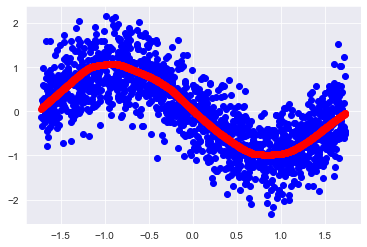

In [51]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)


# Overlay the sine wave
ax.scatter(X_test, y_test, color='b')
# Overlay the sine wave
ax.scatter(X_test, y_pred4, color='r')

plt.show()

The tail looks better, will adding even more layers help?

In [52]:
mlp5 = MLPRegressor(random_state=5, hidden_layer_sizes=[100,80,60,40,20])

In [53]:
mlp5.fit(X_train.reshape(-1, 1), y_train)

MLPRegressor(hidden_layer_sizes=[100, 80, 60, 40, 20], random_state=5)

In [54]:
mlp5.n_layers_

7

In [55]:
y_pred5 = mlp5.predict(X_test.reshape(-1, 1))

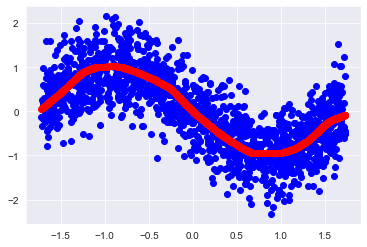

In [56]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)


# Overlay the sine wave
ax.scatter(X_test, y_test, color='b')
# Overlay the sine wave
ax.scatter(X_test, y_pred5, color='r')

plt.show()

This doesn't seem like a monumental gain.
### Changing Activation Function
We can try the way the neurons are activated.

In [59]:
mlp6 = MLPRegressor(random_state=5, activation='relu')

In [60]:
mlp6.fit(X_train.reshape(-1, 1), y_train)

MLPRegressor(random_state=5)

In [61]:
y_pred6 = mlp6.predict(X_test.reshape(-1, 1))

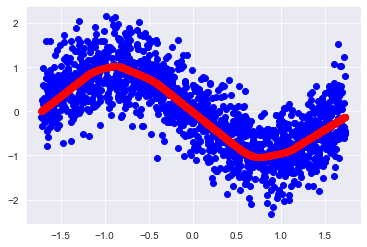

In [62]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)


# Overlay the sine wave
ax.scatter(X_test, y_test, color='b')
# Overlay the sine wave
ax.scatter(X_test, y_pred6, color='r')

plt.show()

Let's combine it with adding more layers.

In [63]:
mlp7 = MLPRegressor(random_state=5, activation='tanh',  hidden_layer_sizes=[100,80,60,40,20])
mlp7.fit(X_train.reshape(-1, 1), y_train)
y_pred7 = mlp7.predict(X_test.reshape(-1, 1))

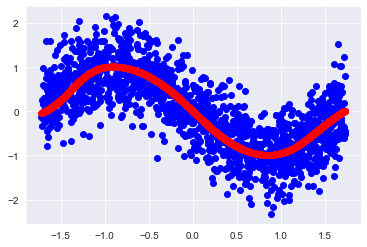

In [64]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)


# Overlay the sine wave
ax.scatter(X_test, y_test, color='b')
# Overlay the sine wave
ax.scatter(X_test, y_pred7, color='r')

plt.show()

Oh hello, neural network performance!
### Changing Learning Rate
Can we do even better?

In [67]:
mlp8 = MLPRegressor(random_state=5, alpha=0.01)
mlp8.fit(X_train.reshape(-1, 1), y_train)
y_pred8 = mlp8.predict(X_test.reshape(-1, 1))

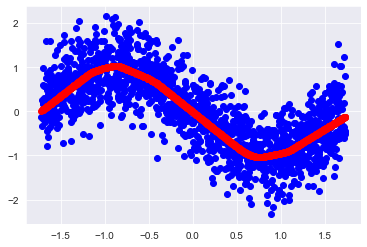

In [68]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)


# Overlay the sine wave
ax.scatter(X_test, y_test, color='b')
# Overlay the sine wave
ax.scatter(X_test, y_pred8, color='r')

plt.show()

Let's combine all the approaches that worked.

In [69]:
mlp9 = MLPRegressor(random_state=5, activation='tanh',  hidden_layer_sizes=[100,80,60,40,20], alpha = 0.1)
mlp9.fit(X_train.reshape(-1, 1), y_train)
y_pred9 = mlp9.predict(X_test.reshape(-1, 1))

/Users/dsozturk/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


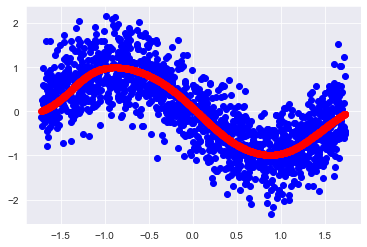

In [70]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)


# Overlay the sine wave
ax.scatter(X_test, y_test, color='b')
# Overlay the sine wave
ax.scatter(X_test, y_pred9, color='r')

plt.show()

Seems like a better fit, but to be sure we need to quantify the performance.
### Evaluation an MLP Regressor
Remember how we used to evaluate a regressor?

In [71]:
from sklearn.metrics import mean_squared_error as mse

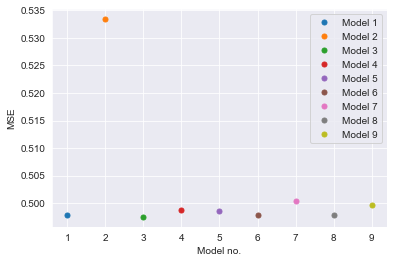

In [72]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)

# Overlay the sine wave
ax.plot(1,mse(y_test,y_pred,squared=False), '.', markersize=10, label='Model 1')
ax.plot(2,mse(y_test,y_pred2,squared=False), '.', markersize=10, label='Model 2')
ax.plot(3,mse(y_test,y_pred3,squared=False), '.', markersize=10, label='Model 3')
ax.plot(4,mse(y_test,y_pred4,squared=False), '.', markersize=10, label='Model 4')
ax.plot(5,mse(y_test,y_pred5,squared=False), '.', markersize=10, label='Model 5')
ax.plot(6,mse(y_test,y_pred6,squared=False), '.', markersize=10, label='Model 6')
ax.plot(7,mse(y_test,y_pred7,squared=False), '.', markersize=10, label='Model 7')
ax.plot(8,mse(y_test,y_pred8,squared=False), '.', markersize=10, label='Model 8')
ax.plot(9,mse(y_test,y_pred9,squared=False), '.', markersize=10, label='Model 9')

ax.set_ylabel('MSE')
ax.set_xlabel('Model no.')
ax.legend()
plt.show()

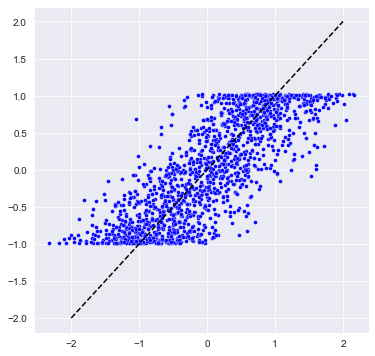

In [73]:
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred7, s=15, color="b")
#sns.kdeplot(x=y_test, y=y_pred7, levels=5, color="w", linewidths=1)
ax.plot(np.linspace(-2,2,100),np.linspace(-2,2,100),'k--')

### TensorFlow representation for MLPRegressor
1. The sklearn MLPRegressor uses 0.1 of the training set for validation, for TensorFlow we would define the validation set separately. <br>
2. MLPRegressor uses mean_squared_error by default, so we are going to define this as our loss function in TensorFlow too. <br>

In [75]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1) # 0.25 x 0.8 = 0.2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 200)               400       
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/18
99/99 [==============================] - 0s 2ms/step - loss: 0.7813 - val_loss: 0.4742
Epoch 2/18
99/99 [==============================] - 0s 1ms/step - loss: 0.4874 - val_loss: 0.4645
Epoch 3/18
99/99 [==============================] - 0s 1ms/step - loss: 0.3513 - val_loss: 0.3424
Epoch 4/18
99/99 [==============================] - 0s 1ms/step - loss: 0.3158 - val_loss: 0.2546
Epoch 5/18
99/99 [==============================] - 0s 1ms/s

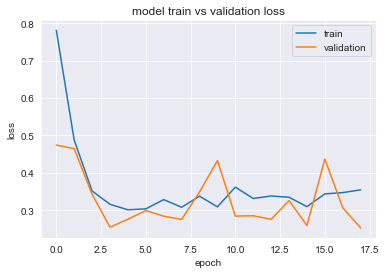

In [77]:
#activation='tanh',  hidden_layer_sizes=[100,80,60,40,20], alpha = 0.1

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200, input_shape=X_train1.shape[1:], activation='tanh'))
#model.add(tf.keras.layers.Dense(80, activation='tanh'))
#model.add(tf.keras.layers.Dense(60, activation='tanh'))
#model.add(tf.keras.layers.Dense(40, activation='tanh'))
#model.add(tf.keras.layers.Dense(20, activation='tanh'))
model.add(tf.keras.layers.Dense(1))

model.summary()

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))

history = model.fit(X_train1, y_train1, validation_data=(X_val, y_val), epochs=18)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')


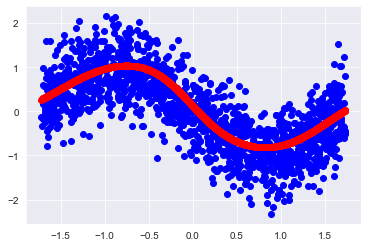

In [78]:
y_pred10 = model.predict(X_test)
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)


# Overlay the sine wave
ax.scatter(X_test, y_test, color='b')
# Overlay the sine wave
ax.scatter(X_test, y_pred10, color='r')

plt.show()

In [79]:
mse(y_test,model.predict(X_test),squared=False)

0.5117901998618909

Text(0.5, 0, 'Neurons in Hidden Layer-1')

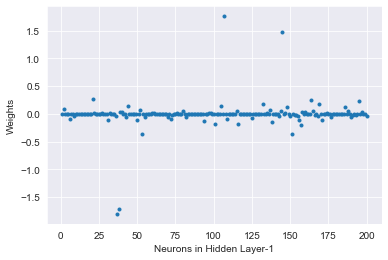

In [80]:
plt.plot(np.arange(1,201,1), np.asarray(model.weights[0]).reshape(-1,1),'.')
plt.ylabel('Weights')
plt.xlabel('Neurons in Hidden Layer-1')

There are other ways we can evaluate the performance.

## MLP Classifier
Now, let's look at how we can use Multi-layer perceptrons for classification problems. First we will recreate that difficult data set using make_moons.

In [81]:
from sklearn.datasets import make_moons

In [82]:
X_moon, y_moon = make_moons(n_samples=300, noise=0.2, random_state=0)

In [83]:
scaler_moon = StandardScaler()
x_scaled_moon = scaler_moon.fit_transform(X_moon)


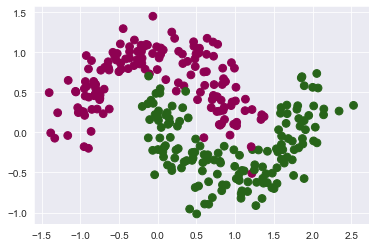

In [84]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)

ax.scatter(X_moon[:,0], X_moon[:,1], c=y_moon, cmap='PiYG', s=60)

Import the MLPClassifier library.

In [86]:
from sklearn.neural_network import MLPClassifier

Now, let's separate the data set into training and test sets.

In [87]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled_moon, y_moon, test_size=0.3)

Text(0.5, 1.0, 'Training Set')

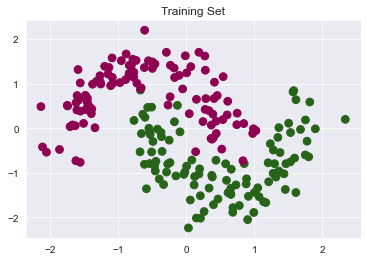

In [88]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)

ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='PiYG', s=60)
plt.title('Training Set')

Text(0.5, 1.0, 'Test Set')

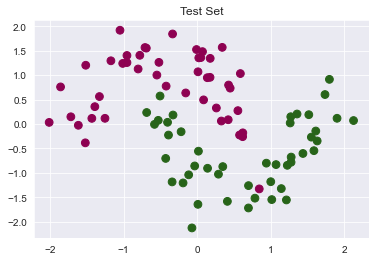

In [89]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)

ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='PiYG', s=60)
plt.title('Test Set')

Create the MLPClassifier.

In [90]:
mlp = MLPClassifier(random_state=5)

In [91]:
mlp.fit(X_train, y_train)

/Users/dsozturk/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=5)

In [92]:
y_pred = mlp.predict(X_test)

In [93]:
y_test

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1])

In [94]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1])

Let's see how the predictions look like.

Text(0.5, 1.0, 'Predictions')

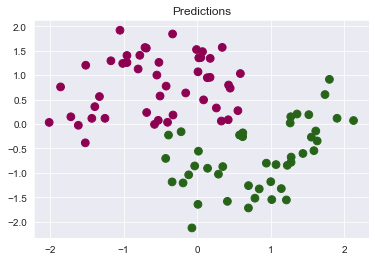

In [95]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)

ax.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap='PiYG', s=60)
plt.title('Predictions')

In [96]:
mlp.hidden_layer_sizes

(100,)

There are subtle differences.
### Changing Neuron Number
Let's see if changing the neuron number will help.

In [97]:
mlp2 = MLPClassifier(random_state=5, hidden_layer_sizes=[10])

In [98]:
mlp2.fit(X_train, y_train)

/Users/dsozturk/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[10], random_state=5)

In [99]:
y_pred2 = mlp2.predict(X_test)

Text(0.5, 1.0, 'Predictions')

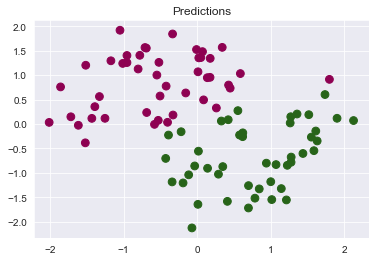

In [100]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)

ax.scatter(X_test[:,0], X_test[:,1], c=y_pred2, cmap='PiYG', s=60)
plt.title('Predictions')

Still, there are some differences.
### Changing Layer Number
Let's see if adding layers will help.

In [101]:
mlp3 = MLPClassifier(random_state=5, hidden_layer_sizes=[100,100])

In [102]:
mlp3.fit(X_train, y_train)

/Users/dsozturk/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[100, 100], random_state=5)

In [103]:
y_pred3 = mlp3.predict(X_test)

Text(0.5, 1.0, 'Predictions')

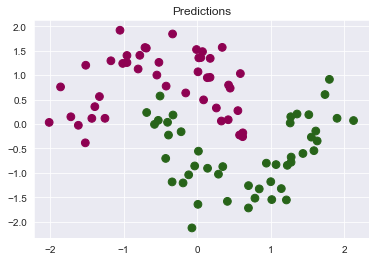

In [104]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)

ax.scatter(X_test[:,0], X_test[:,1], c=y_pred3, cmap='PiYG', s=60)
plt.title('Predictions')

### Changing Activation Function
Let's see how to change the activation function.

In [105]:
mlp4 = MLPClassifier(random_state=5, hidden_layer_sizes=[10], activation='tanh')

In [106]:
mlp4.fit(X_train, y_train)

/Users/dsozturk/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=[10], random_state=5)

In [107]:
y_pred4 = mlp4.predict(X_test)

Text(0.5, 1.0, 'Predictions')

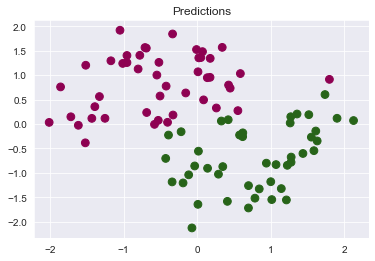

In [108]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)

ax.scatter(X_test[:,0], X_test[:,1], c=y_pred4, cmap='PiYG', s=60)
plt.title('Predictions')

In [109]:
mlp.alpha

0.0001

### Changing Learning Rate/Regularization
Another parameter we can tune is the learning rate.

In [110]:
mlp5 = MLPClassifier(random_state=5, hidden_layer_sizes=[10], alpha=0.01)

In [111]:
mlp5.fit(X_train, y_train)

/Users/dsozturk/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, hidden_layer_sizes=[10], random_state=5)

In [112]:
y_pred5 = mlp5.predict(X_test)

Text(0.5, 1.0, 'Predictions')

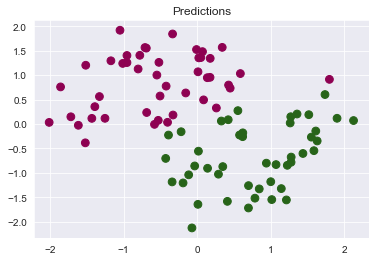

In [113]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)

ax.scatter(X_test[:,0], X_test[:,1], c=y_pred5, cmap='PiYG', s=60)
plt.title('Predictions')

It is hard to evaluate by eye.
### Evaluation an MLP Classifier
Remember how we used to evaluate a classifier?

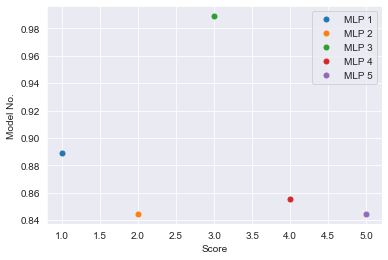

In [114]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)

ax.plot(1, mlp.score(X_test,y_test),'.', markersize=10, label='MLP 1')
ax.plot(2, mlp2.score(X_test,y_test),'.', markersize=10, label='MLP 2')
ax.plot(3, mlp3.score(X_test,y_test),'.', markersize=10, label='MLP 3')
ax.plot(4, mlp4.score(X_test,y_test),'.', markersize=10, label='MLP 4')
ax.plot(5, mlp5.score(X_test,y_test),'.', markersize=10, label='MLP 5')

ax.set_ylabel('Model No.')
ax.set_xlabel('Score')
ax.legend()

In [115]:
from sklearn.metrics import silhouette_score

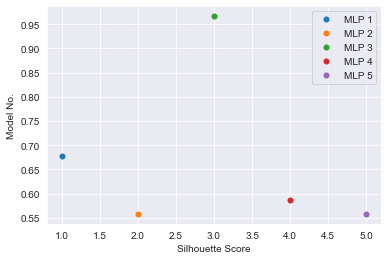

In [116]:
fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)

ax.plot(1,silhouette_score(y_test.reshape(-1, 1),y_pred),'.', markersize=10, label='MLP 1')
ax.plot(2,silhouette_score(y_test.reshape(-1, 1),y_pred2),'.', markersize=10, label='MLP 2')
ax.plot(3,silhouette_score(y_test.reshape(-1, 1),y_pred3),'.', markersize=10, label='MLP 3')
ax.plot(4,silhouette_score(y_test.reshape(-1, 1),y_pred4),'.', markersize=10, label='MLP 4')
ax.plot(5,silhouette_score(y_test.reshape(-1, 1),y_pred5),'.', markersize=10, label='MLP 5')
ax.set_ylabel('Model No.')
ax.set_xlabel('Silhouette Score')

ax.legend()

### TensorFlow representation for MLPClassifier
1. The sklearn MLPClassifier uses 0.1 of the training set for validation, for TensorFlow we would define the validation set separately. <br>
2. MLPClassifier uses log-loss by default, so we are going to define this as our loss function in TensorFlow too. <br>

In [117]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1) # 0.25 x 0.8 = 0.2

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 200)               600       
                                                                 
 dense_11 (Dense)            (None, 100)               20100     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 20,801
Trainable params: 20,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/18
6/6 [==============================] - 0s 27ms/step - loss: 2.4528 - val_loss: 2.2418
Epoch 2/18
6/6 [==============================] - 0s 6ms/step - loss: 1.9961 - val_loss: 3.0146
Epoch 3/18
6/6 [==============================] - 0s 6ms/step - loss: 2.2850 - val_loss: 5.1165
Epoch 4/18
6/6 [=========

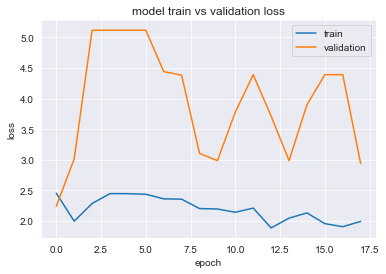

In [121]:
#activation='tanh',  hidden_layer_sizes=[100,80,60,40,20], alpha = 0.1

model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(200, input_shape=X_train1.shape[1:], activation='tanh'))
#model3.add(tf.keras.layers.BatchNormalization())
#model3.add(tf.keras.layers.Dropout(0.1))
model3.add(tf.keras.layers.Dense(100, activation='tanh'))
#model.add(tf.keras.layers.Dense(60, activation='tanh'))
#model.add(tf.keras.layers.Dense(40, activation='tanh'))
#model.add(tf.keras.layers.Dense(20, activation='tanh'))
model3.add(tf.keras.layers.Dense(1))

model3.summary()

model3.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

history = model3.fit(X_train1, y_train1, validation_data=(X_val, y_val), epochs=18, batch_size=32)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')


Text(0.5, 1.0, 'Predictions')

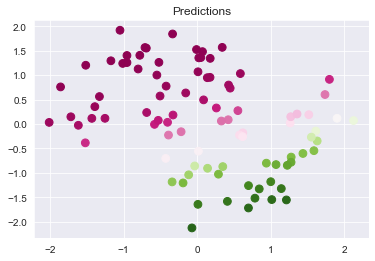

In [122]:

fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)

ax.scatter(X_test[:,0], X_test[:,1], c=[model3.predict(X_test)], cmap='PiYG', s=60)
plt.title('Predictions')

TensorFlow returns the prediction probabilities once again. Therefore, let's apply the threshold.

Text(0.5, 1.0, 'Predictions')

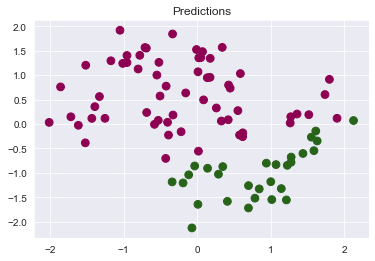

In [123]:

fig = plt.figure(figsize=[6,4])
ax = plt.subplot(111)

ax.scatter(X_test[:,0], X_test[:,1], c=[model3.predict(X_test)> 0.5], cmap='PiYG', s=60)
plt.title('Predictions')


### Visualization of TensorFlow Models

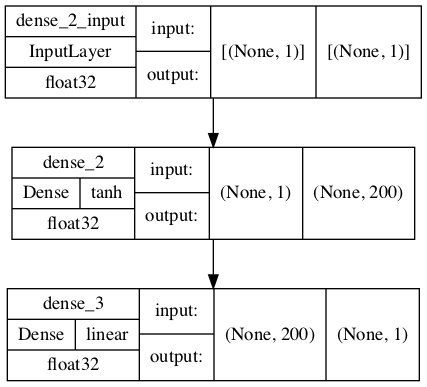

In [124]:
dot_img_file = './model.png'
tf.keras.utils.plot_model(model, 
                          to_file=dot_img_file, 
                          show_shapes=True,
                          show_dtype=True,
                          show_layer_activations=True)

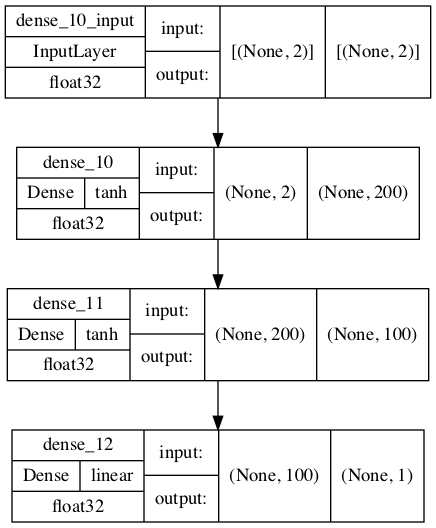

In [125]:
dot_img_file = './model3.png'
tf.keras.utils.plot_model(model3, 
                          to_file=dot_img_file, 
                          show_shapes=True,
                          show_dtype=True,
                          show_layer_activations=True)

In [126]:
y_pred = model3.predict(X_test)>0.5

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[44  1]
 [17 28]]


0.8

In [127]:
cm2 = confusion_matrix(y_test, y_pred3)
print(cm2)
accuracy_score(y_test, y_pred3)

[[44  1]
 [ 0 45]]


0.9888888888888889

👏 Congratulations, you have completed the Neural Network Workbook!